<h1>Brain Tumor image Visualization and Classification (MRI)</h1>

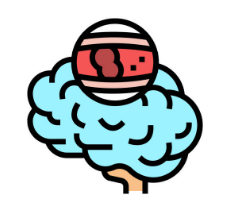

<h3>Content</h3>

- Brain Tumor types
- Library
- Loading the dataset
- Data analysis
- Image visualisation
- Image preprocessing
- Modelling

<h2>Brain Tumor types</h2>

<h3>Glioma Tumor</h3>

A glioma is a type of brain tumor that starts from glial cells, which are cells that surround and support nerve cells in the brain and spinal cord. There are different types of gliomas, such as astrocytoma, glioblastoma, oligodendroglioma and ependymoma. Some gliomas are benign, which means they do not spread to other parts of the body. Others are malignant, which means they grow quickly and invade healthy tissue. Gliomas can cause various symptoms depending on where they are located in the brain or spinal cord, such as headaches, nausea, confusion, memory loss, vision problems, speech difficulties and seizures. Gliomas can affect people of any age, but they are more common in adults than in children. The treatment options for gliomas may include surgery, radiation therapy, chemotherapy and other therapies.

<h3>Meningioma Tumor</h3>

Meningioma is a type of brain tumor that starts from the meninges, the membranes that cover the brain and spinal cord. Meningiomas are usually benign, which means they do not spread to other parts of the body, but they can cause symptoms such as headaches, vision problems, seizures and memory loss. Meningiomas are the most common type of tumor that forms in the head and affect more women than men. The treatment options for meningiomas may include surgery, radiation therapy or watchful waiting.

<h3>Pituitary Tumor</h3>

A pituitary brain tumor is a type of tumor that develops in the pituitary gland, which is a small organ at the base of the brain that produces various hormones. A pituitary brain tumor is not technically a brain tumor, because the pituitary gland is not part of the brain, but it is close to it. Pituitary brain tumors can be benign or malignant, meaning they can be noncancerous or cancerous. Most pituitary brain tumors are benign and do not spread to other parts of the body. Pituitary brain tumors can cause different symptoms depending on their size and the type of hormones they produce. Some of the symptoms may include headaches, vision problems, nausea, fatigue, mood changes, infertility and sexual dysfunction.. Pituitary brain tumors can be diagnosed by blood tests, urine tests, MRI scans, CT scans and vision test.

<h2>Libraries</h2>

In [1]:
import os
import cv2
import glob
import random
import imageio
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import skimage.measure   
import tensorflow as tf
from skimage import data
import albumentations as A
import scipy.ndimage as ndi
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
#from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from tensorflow.keras import regularizers
from skimage.measure.entropy import shannon_entropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam , Adamax
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , classification_report
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense,BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h2>Loading the dataset</h2>

In [3]:
#Train
train_glioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/*.jpg')
train_menignioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/*.jpg')
train_pituitary = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/*.jpg')
train_no = glob.glob('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/*.jpg')

#Test
test_glioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/*.jpg')
test_menignioma = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/*.jpg')
test_pituitary = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/*.jpg')
test_no = glob.glob('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/*.jpg')

<h2>Data analysis</h2>

In [3]:
train_glioma_number = len(train_glioma)
train_menignioma_number = len(train_menignioma)
train_pituitary_number = len(train_pituitary)
train_no_number = len(train_no)

test_glioma_number = len(test_glioma)
test_menignioma_number = len(test_menignioma)
test_pituitary_number = len(test_pituitary)
test_no_number = len(test_no)

print("Number of train_glioma: ",train_glioma_number)
print("Number of train_menignioma: ",train_menignioma_number)
print("Number of train_pituitary: ",train_pituitary_number)
print("Number of train_no: ",train_no_number)
print("Number of test_glioma: ",test_glioma_number)
print("Number of test_menignioma: ",train_menignioma_number)
print("Number of test_pituitary: ",train_pituitary_number)
print("Number of test_no: ",train_no_number)

Number of train_glioma:  826
Number of train_menignioma:  822
Number of train_pituitary:  822
Number of train_no:  395
Number of test_glioma:  100
Number of test_menignioma:  822
Number of test_pituitary:  822
Number of test_no:  395


<h3>Pie-chart of the Train image</h3>


In [ ]:
plt.figure(figsize=(5,5))
colors = ['#4285f4','#ea4335',"#e94cdc","#00FFFF"]
plt.rcParams.update({'font.size': 8})
plt.pie([train_glioma_number,
         train_menignioma_number,train_pituitary_number,train_no_number],
        labels=['Glioma', 'Menignioma','Pituitary','No_tumor'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

<h3>Pie-chart of the Test image</h3>

In [ ]:
plt.figure(figsize=(5,5))
colors = ['#4285f4','#ea4335',"#e94cdc","#00FFFF"]
plt.rcParams.update({'font.size': 8})
plt.pie([test_glioma_number,
         test_menignioma_number,test_pituitary_number,test_no_number],
        labels=['Glioma', 'Menignioma','Pituitary','No_tumor'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

<h3>Pie-chart of the Test and Train image</h3>

In [ ]:
plt.figure(figsize=(5,5))
colors = ["#e94cdc","#00FFFF"]
plt.rcParams.update({'font.size': 8})
plt.pie([test_glioma_number+
         test_menignioma_number+test_pituitary_number+test_no_number,train_glioma_number+
         train_menignioma_number+train_pituitary_number+train_no_number],
        labels=['test', 'train'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025),
        startangle=30);

In [ ]:
print('total train data:',(train_glioma_number+
         train_menignioma_number+train_pituitary_number+train_no_number))
print('total test data:',(test_glioma_number+test_menignioma_number+test_pituitary_number+test_no_number))

<h3>Image Visualization</h3>

In [ ]:
def images_visualization(image, title,a):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = mpimg.imread(random_image_path)
        plt.subplot(1, a, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(title)
    plt.show()

In [ ]:
print("Train image visualisation\n")
images_visualization(train_glioma, 'Glioma',3)
images_visualization(train_menignioma, 'Menignioma',3)
images_visualization(train_pituitary, 'Pituitary',3)
images_visualization(train_no, 'No-Tumor',3)

<h2>Image Visualization</h2>


<h3>Convolutoin Filter definition</h3>

这段代码定义了一个名为 fiter 的函数，用于显示经过 Laplacian 滤波的图像。

函数的参数如下：

image：包含图像路径的列表。
title：每张图像对应的标题。
a：图像的数量。
m：定义的 Laplacian 滤波器矩阵。
函数的主要步骤如下：

使用 plt.figure(figsize=(8, 8)) 设置图像的大小为 8x8 英寸。
使用 random.choice(image) 随机选择一个图像路径。
使用 cv2.imread(random_image_path) 通过 OpenCV 读取图像。
定义 Laplacian 滤波器矩阵为 np.array(m)。
使用 cv2.filter2D(img, -1, laplacian_kernel) 应用 Laplacian 滤波器到图像上。
使用 plt.subplot(1, a, i+1) 创建一个子图，并设置总行数为 1，总列数为 a，当前子图为索引 i+1。
使用 plt.imshow(laplacian_img, cmap='jet') 显示经过滤波的图像，使用 'jet' 颜色映射。
使用 plt.axis('off') 关闭坐标轴显示。
使用 plt.title(title) 设置当前子图的标题。
循环步骤 2-9 直到所有图像都显示完毕。
使用 plt.show() 显示所有子图。
示例代码中展示了如何调用这个函数，并传入相应的参数。你可以根据自己的需要提供图像的路径、标题、图像数量以及 Laplacian 滤波器矩阵。

In [ ]:
def fiter(image, title,a,m):#a=number of images, m = filter matrix
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = cv2.imread(random_image_path) # read the image using cv2
        laplacian_kernel = np.array(m) # define the Laplacian kernel
        laplacian_img = cv2.filter2D(img, -1, laplacian_kernel) # apply the Laplacian filter using cv2.filter2D
        plt.subplot(1, a, i+1)
        plt.imshow(laplacian_img, cmap='jet') # display the filtered image using plt.imshow and cmap='jet'
        plt.axis('off')
        plt.title(title)
    plt.show()

<h4>Convolution Gaussian filter</h4>

In [ ]:
m = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]# Gaussian filter 

fiter(train_glioma, 'Glioma',3,m)
fiter(train_menignioma, 'Menignioma',3,m)
fiter(train_pituitary, 'Pituitary',3,m)
fiter(train_no, 'No-Tumor',3,m)

<h4>Laplacian of Gaussian</h4>

In [ ]:
m =  [[1, 1, 1], [1, -8, 1], [1, 1, 1]]#laplacian of Gaussian filter 

fiter(train_glioma, 'Glioma',3,m)
fiter(train_menignioma, 'Menignioma',3,m)
fiter(train_pituitary, 'Pituitary',3,m)
fiter(train_no, 'No-Tumor',3,m)

<h4>Laplacian of Gaussian 2</h4>

In [ ]:
m =  [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]#laplacian of Gaussian filter 

fiter(train_glioma, 'Glioma',3,m)
fiter(train_menignioma, 'Menignioma',3,m)
fiter(train_pituitary, 'Pituitary',3,m)
fiter(train_no, 'No-Tumor',3,m)

<h3>clahe Filter function definition</h3>

CLAHE 是指对比度受限自适应直方图均衡化 (Contrast Limited Adaptive Histogram Equalization)。它是一种用于增强图像对比度的图像处理算法。

In [ ]:
def clahe(image, title,a):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = cv2.imread(random_image_path) # read the image using cv2
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale
        clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
        clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image
        plt.subplot(1, a, i+1)
        plt.imshow(clahe_img, cmap='jet') # display the filtered image using plt.imshow and cmap='jet'
        plt.axis('off')
        plt.title(title)
    plt.show()

<h4>Clahe Filter</h4>

In [ ]:
clahe(train_glioma, 'Glioma',3)
clahe(train_menignioma, 'Menignioma',3)
clahe(train_pituitary, 'Pituitary',3)
clahe(train_no,'No-Tumor',3)

<h3>Entropy Shanon filter function definition</h3>

Shannon entropy filter 是一种图像滤波器，用于在图像中检测和增强纹理。它基于信息熵的概念，可以测量图像中像素的复杂性和不确定性。通过应用 Shannon entropy filter，可以突出图像中的纹理区域，使其更加明显

In [ ]:
def entr(image, title,a):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = cv2.imread(random_image_path) # read the image using cv2
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale
        # create a CLAHE object with clip limit and tile grid size
        entr_img = entropy(img_gray, disk(2)) 
        plt.subplot(1, a, i+1)
        plt.imshow(entr_img, cmap='viridis')# display the filtered image using plt.imshow and cmap='jet'
        plt.axis('off')
        plt.title(title)
    plt.show()

<h4>Entropy shanon Filter</h4>

In [ ]:
entr(train_glioma, 'Glioma',3)
entr(train_menignioma, 'Menignioma',3)
entr(train_pituitary, 'Pituitary',3)
entr(train_no,'No-Tumor',3)

<h2>Image preprocessing</h2>

<h3>Image dataset creation</h3>

In [2]:
train_data_path = '/kaggle/input/brain-tumor-classification-mri/Training'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [3]:
train_df

,filepaths,label
0,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
...,...,...
2865,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
2866,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
2867,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
2868,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  2870 non-null   object
 1   label      2870 non-null   object
dtypes: object(2)
memory usage: 45.0+ KB


In [5]:
test_data_path = '/kaggle/input/brain-tumor-classification-mri/Testing'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [6]:
test_df

,filepaths,label
0,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
...,...,...
389,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
390,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
391,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
392,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  394 non-null    object
 1   label      394 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


<h3>Split dataset</h3>

In [8]:
valid , test = train_test_split(test_df , train_size = 0.5 , shuffle = True , random_state= 42)

<h3>Image resize and generation</h3>

In [9]:
img_size = (220 ,220)#This defines a variable called img_size that stores a tuple of two integers, 220 and 220. This will be used as the target size for resizing the images.
batch_size = 15 # This defines a variable called batch_size that stores an integer, 16. This will be used as the number of images per batch.

tr_gen = ImageDataGenerator()#This creates an instance of the ImageDataGenerator class and assigns it to a variable called tr_gen. This will be used to create the train_gen object later. By default, this does not apply any preprocessing or augmentation to the images, but you can pass some arguments to the constructor to customize it.
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 2870 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.
Found 197 validated image filenames belonging to 4 classes.


<h2>Modelling</h2>

<h3>Model architecture</h3>

这段代码是用于定义和编译一个基于 EfficientNet 模型的神经网络模型。以下是对每个代码行的解释：

1. `gen_dict = train_gen.class_indices`：获取训练数据生成器 `train_gen` 中类别和对应索引的字典。这将用于后续的模型训练和预测。

2. `classes = list(gen_dict.keys())`：将类别字典中的键（类别）转换为列表，以便后续使用。

3. `images, labels = next(train_gen)`：从训练数据生成器 `train_gen` 中获取下一个批次的图像数据和对应标签。

4. `img_shape = (img_size[0], img_size[1], 3)`：定义图像的形状。这里的 `img_size` 是之前定义的图像目标大小，这个形状表示三通道 RGB 图像。

5. `num_class = len(classes)`：获取类别的总数，用于后续模型的输出层。

6. `base_model = tf.keras.applications.efficientnet.EfficientNetB3(...)`：使用 EfficientNet 模型的 B3 版本创建一个基准模型。`include_top=False` 表示不包括分类层，`weights='imagenet'` 表示加载预训练的权重，`input_shape` 表示输入图像的形状，`pooling='max'` 表示使用最大池化来减小特征图的空间尺寸。

7. `model = Sequential([...])`：使用 `Sequential` 模型定义一个顺序模型，并将之前创建的 `base_model` 作为第一层。该模型由一系列层组成，包括批归一化层 (`BatchNormalization`)、全连接层 (`Dense`)、丢弃层 (`Dropout`) 和输出层 (`Dense`)。这些层定义了模型的结构和参数。

8. `model.compile(...)`：编译模型，配置训练过程中的优化器、损失函数和评估指标。这里使用了 `Adamax` 优化器，学习率为 0.001，损失函数为分类交叉熵 (`categorical_crossentropy`)，评价指标为准确率 (`accuracy`)。

9. `model.summary()`：打印出模型的结构摘要和参数数量。

这段代码定义了一个基于 EfficientNet 模型的神经网络，并编译了模型以进行训练和评估。

希望对你有所帮助！如果还有其他问题，请随时提问。

In [13]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,

                                                               input_shape = img_shape, pooling= 'max')
model_op1 = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

#optimizer
model_op1.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_op1.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,184,179
Trainable params: 11,093,804
Non

<h3>Model training</h3>

In [ ]:
base_model.summary()

In [14]:
import time

In [12]:
Epochs = 8
start_time = time.time()

history_op1 = model_op1.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)
end_time = time.time()



Epoch 1/8


2024-04-03 08:47:59.147358: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 103s 209ms/step - loss: 7.0473 - accuracy: 0.7972 - val_loss: 6.3884 - val_accuracy: 0.6548
Epoch 2/8
192/192 [==============================] - 37s 191ms/step - loss: 4.5813 - accuracy: 0.9261 - val_loss: 4.5012 - val_accuracy: 0.7005
Epoch 3/8
192/192 [==============================] - 37s 191ms/step - loss: 3.1740 - accuracy: 0.9638 - val_loss: 3.1969 - val_accuracy: 0.7868
Epoch 4/8
192/192 [==============================] - 37s 193ms/step - loss: 2.2113 - accuracy: 0.9707 - val_loss: 2.3362 - val_accuracy: 0.7970
Epoch 5/8
192/192 [==============================] - 37s 192ms/step - loss: 1.5602 - accuracy: 0.9777 - val_loss: 2.0072 - val_accuracy: 0.7766
Epoch 6/8
192/192 [==============================] - 37s 193ms/step - loss: 1.1025 - accuracy: 0.9875 - val_loss: 1.5615 - val_accuracy: 0.7919
Epoch 7/8
192/192 [==============================] - 37s 191ms/step - loss: 0.8171 - accuracy: 0.9843 - val_loss: 1.3764 - val_accuracy: 0.7665
E

In [13]:
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes
print("Total length of process:", total_time_minutes, "minutes")

Total length of process: 6.037974460919698 minutes


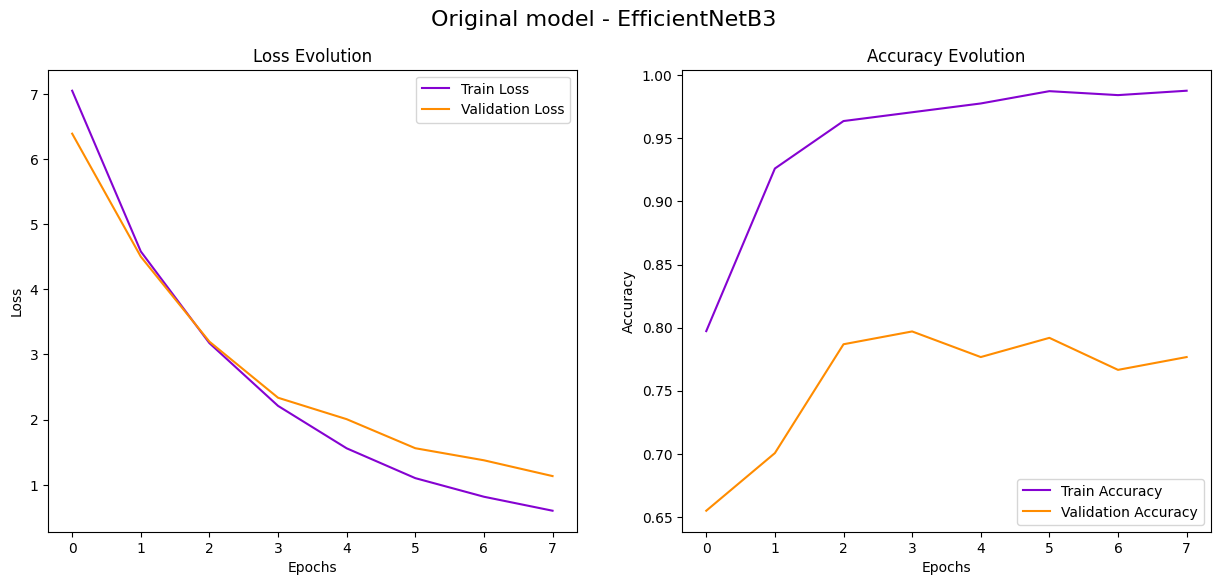

In [14]:
history_dict_op1 = history_op1.history
val_loss_op1 = history_dict_op1['val_loss']
train_loss_op1 = history_dict_op1['loss']
val_accuracy_op1 = history_dict_op1['val_accuracy']
train_accuracy_op1 = history_dict_op1['accuracy']
plt.figure(figsize=(15,6))


# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_op1, label='Train Loss', color='#8502d1')
plt.plot(val_loss_op1, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_op1, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_op1, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('Original model - EfficientNetB3  ', fontsize=16)

plt.show()

# הענשה מאוד גדולה

L2=0.8

In [15]:
model_op2 = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.8) , activity_regularizer = regularizers.l1(0.8),
         bias_regularizer= regularizers.l1(0.8) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

#optimizer
model_op2.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_op2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization_1 (Batc  (None, 1536)             6144      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               393472    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,184,179
Trainable params: 11,093,804
Non-trainable params: 90,375
_____________________________________

In [16]:
Epochs = 25
start_time = time.time()
history_op2 = model_op2.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)
end_time = time.time()


Epoch 1/25


2024-04-03 16:00:28.348161: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 109s 214ms/step - loss: 151.9407 - accuracy: 0.2902 - val_loss: 46.9389 - val_accuracy: 0.1675
Epoch 2/25
192/192 [==============================] - 37s 192ms/step - loss: 21.3791 - accuracy: 0.2725 - val_loss: 7.1165 - val_accuracy: 0.1675
Epoch 3/25
192/192 [==============================] - 37s 191ms/step - loss: 4.2091 - accuracy: 0.3017 - val_loss: 2.3842 - val_accuracy: 0.1675
Epoch 4/25
192/192 [==============================] - 37s 192ms/step - loss: 2.2024 - accuracy: 0.2972 - val_loss: 1.7979 - val_accuracy: 0.2081
Epoch 5/25
192/192 [==============================] - 37s 192ms/step - loss: 1.7624 - accuracy: 0.2902 - val_loss: 1.7119 - val_accuracy: 0.1675
Epoch 6/25
192/192 [==============================] - 37s 191ms/step - loss: 1.8928 - accuracy: 0.2815 - val_loss: 1.7267 - val_accuracy: 0.3401
Epoch 7/25
192/192 [==============================] - 37s 191ms/step - loss: 1.7248 - accuracy: 0.2861 - val_loss: 1.6854 - val_accuracy

In [17]:
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes
print("Total length of process:", total_time_minutes, "minutes")

Total length of process: 16.720122730731966 minutes


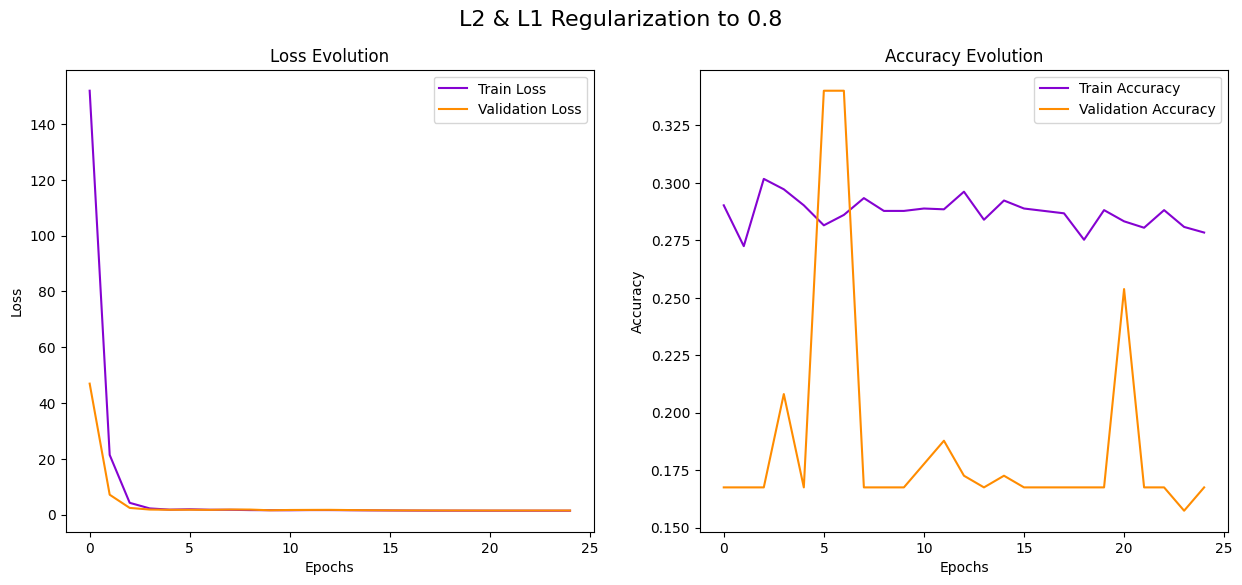

In [18]:
history_dict_op2 = history_op2.history
val_loss_op2 = history_dict_op2['val_loss']
train_loss_op2 = history_dict_op2['loss']
val_accuracy_op2 = history_dict_op2['val_accuracy']
train_accuracy_op2 = history_dict_op2['accuracy']
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_op2, label='Train Loss', color='#8502d1')
plt.plot(val_loss_op2, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_op2, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_op2, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('L2 & L1 Regularization to 0.8  ', fontsize=16)

plt.show()


# No BatchNormalization 

In [19]:
model_op3 = Sequential([
    base_model,
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

#optimizer
model_op3.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_op3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 dense_4 (Dense)             (None, 256)               393472    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,178,035
Trainable params: 11,090,732
Non-trainable params: 87,303
_________________________________________________________________


In [21]:
Epochs = 25
start_time = time.time()
history_op3 = model_op3.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)
end_time = time.time()
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes
print("Total length of process:", total_time_minutes, "minutes")

Epoch 1/25
192/192 [==============================] - 37s 191ms/step - loss: 0.6508 - accuracy: 0.9411 - val_loss: 1.1781 - val_accuracy: 0.7614
Epoch 2/25
192/192 [==============================] - 37s 192ms/step - loss: 0.4548 - accuracy: 0.9721 - val_loss: 1.0992 - val_accuracy: 0.7868
Epoch 3/25
192/192 [==============================] - 37s 191ms/step - loss: 0.3498 - accuracy: 0.9861 - val_loss: 1.0944 - val_accuracy: 0.7716
Epoch 4/25
192/192 [==============================] - 37s 192ms/step - loss: 0.2805 - accuracy: 0.9930 - val_loss: 1.0783 - val_accuracy: 0.7665
Epoch 5/25
192/192 [==============================] - 37s 191ms/step - loss: 0.2417 - accuracy: 0.9972 - val_loss: 1.0214 - val_accuracy: 0.7716
Epoch 6/25
192/192 [==============================] - 37s 190ms/step - loss: 0.2103 - accuracy: 0.9983 - val_loss: 0.9710 - val_accuracy: 0.7766
Epoch 7/25
192/192 [==============================] - 37s 191ms/step - loss: 0.1805 - accuracy: 1.0000 - val_loss: 0.9678 - val_ac

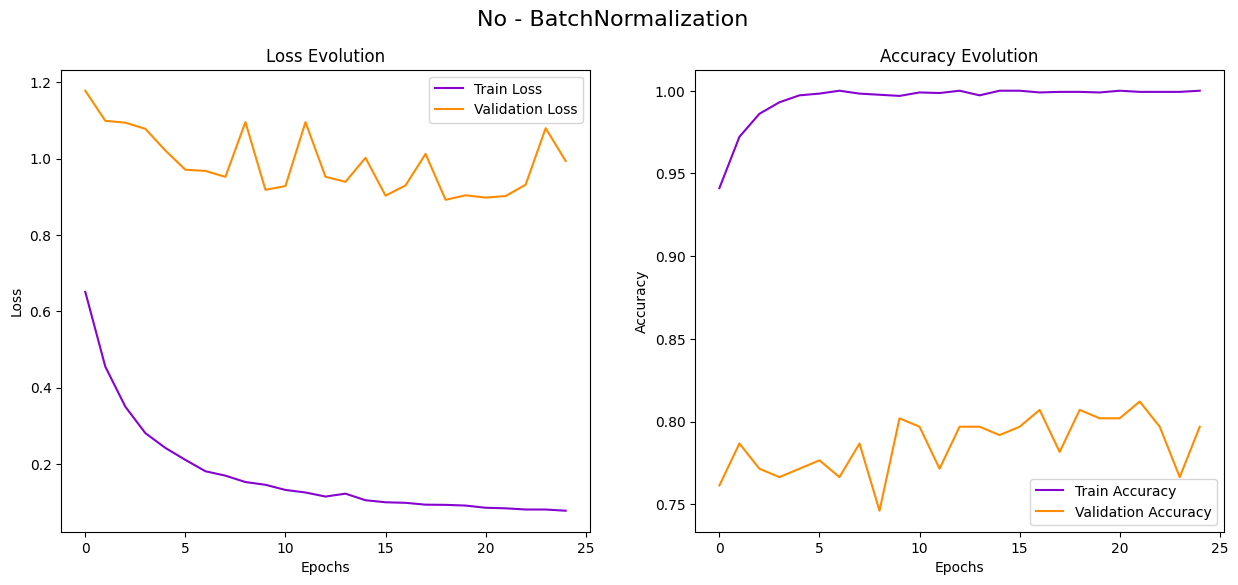

In [22]:
history_dict_op3 = history_op3.history
val_loss_op3 = history_dict_op3['val_loss']
train_loss_op3 = history_dict_op3['loss']
val_accuracy_op3 = history_dict_op3['val_accuracy']
train_accuracy_op3 = history_dict_op3['accuracy']
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_op3, label='Train Loss', color='#8502d1')
plt.plot(val_loss_op3, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_op3, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_op3, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('No - BatchNormalization   ', fontsize=16)

plt.show()


# גודל תמונה 512

In [ ]:
img_size = (512 ,512)#This defines a variable called img_size that stores a tuple of two integers, 220 and 220. This will be used as the target size for resizing the images.
batch_size = 15 # This defines a variable called batch_size that stores an integer, 16. This will be used as the number of images per batch.

tr_gen = ImageDataGenerator()#This creates an instance of the ImageDataGenerator class and assigns it to a variable called tr_gen. This will be used to create the train_gen object later. By default, this does not apply any preprocessing or augmentation to the images, but you can pass some arguments to the constructor to customize it.
ts_gen= ImageDataGenerator()

train_gen_iz = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen_iz = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen_iz = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

In [ ]:
model_iz = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

#optimizer
model_iz.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_iz.summary()

In [ ]:
Epochs = 25
start_time = time.time()
history_iz = model_iz.fit(x= train_gen_iz , epochs = Epochs , verbose = 1 , validation_data = valid_gen_iz ,
                   validation_steps = None , shuffle = False)
end_time = time.time()
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes
print("Total length of process:", total_time_minutes, "minutes")

In [ ]:
history_dict_iz = history_iz.history
val_loss_iz = history_dict_iz['val_loss']
train_loss_iz = history_dict_iz['loss']
val_accuracy_iz = history_dict_iz['val_accuracy']
train_accuracy_iz = history_dict_iz['accuracy']
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_iz, label='Train Loss', color='#8502d1')
plt.plot(val_loss_iz, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_iz, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_iz, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('Img size to 512 ', fontsize=16)

plt.show()


# 150 איפוק

In [15]:
Epochs = 150
start_time = time.time()

history_op4 = model_op1.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)
end_time = time.time()



Epoch 1/150
192/192 [==============================] - 37s 193ms/step - loss: 0.4704 - accuracy: 0.9913 - val_loss: 1.2853 - val_accuracy: 0.7817
Epoch 2/150
192/192 [==============================] - 37s 193ms/step - loss: 0.3668 - accuracy: 0.9944 - val_loss: 1.0590 - val_accuracy: 0.7817
Epoch 3/150
192/192 [==============================] - 37s 193ms/step - loss: 0.3064 - accuracy: 0.9916 - val_loss: 1.2564 - val_accuracy: 0.7411
Epoch 4/150
192/192 [==============================] - 37s 192ms/step - loss: 0.2778 - accuracy: 0.9882 - val_loss: 0.8497 - val_accuracy: 0.8020
Epoch 5/150
192/192 [==============================] - 37s 193ms/step - loss: 0.2235 - accuracy: 0.9944 - val_loss: 0.8645 - val_accuracy: 0.8122
Epoch 6/150
192/192 [==============================] - 37s 193ms/step - loss: 0.2088 - accuracy: 0.9927 - val_loss: 1.1787 - val_accuracy: 0.7411
Epoch 7/150
192/192 [==============================] - 38s 197ms/step - loss: 0.1892 - accuracy: 0.9937 - val_loss: 0.9221 -

In [16]:
end_time = time.time()
total_time_seconds = end_time - start_time
total_time_minutes = total_time_seconds / 60  # Convert seconds to minutes
print("Total length of process:", total_time_minutes, "minutes")

Total length of process: 94.36630016962687 minutes


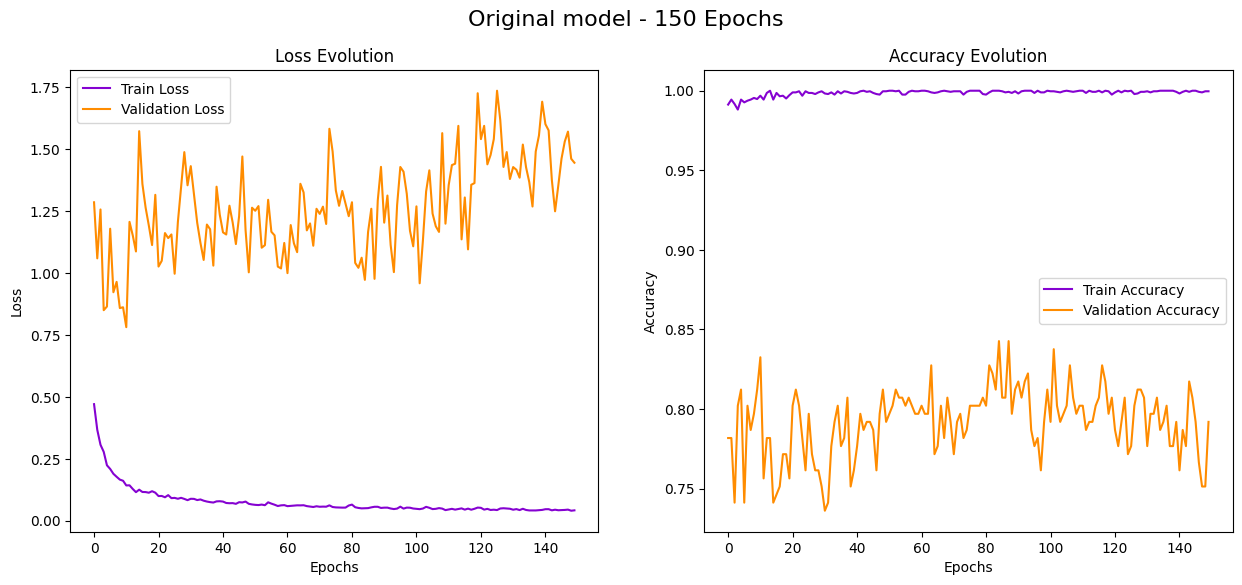

In [17]:
history_dict_op4 = history_op4.history
val_loss_op4 = history_dict_op4['val_loss']
train_loss_op4 = history_dict_op4['loss']
val_accuracy_op4 = history_dict_op4['val_accuracy']
train_accuracy_op4 = history_dict_op4['accuracy']
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_op4, label='Train Loss', color='#8502d1')
plt.plot(val_loss_op4, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_op4, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_op4, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle('Original model - 150 Epochs  ', fontsize=16)

plt.show()


# דאטה אוגמנטיישן

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


In [27]:
img_size = (220, 220)
batch_size = 15

# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)



In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [29]:
base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(img_size[0], img_size[1], 3), pooling='max')

model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.4, seed=75),
    Dense(train_generator.num_classes, activation='softmax')
])

In [31]:
# Compile the model
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
epochs = 25
start_time = time.time()

history_dg = model.fit(
    train_generator,
    epochs=epochs,
    verbose=1,
    validation_data=test_generator,
    validation_steps=None,  # Set to None for using the entire validation set
    shuffle=False  # Shuffle is handled by the generator
)


end_time = time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization_2 (Batc  (None, 1536)             6144      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 256)               393472    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,184,179
Trainable params: 11,093,804
Non-trainable params: 90,375
_____________________________________

2024-04-03 20:06:39.083537: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


192/192 [==============================] - 98s 213ms/step - loss: 0.8498 - accuracy: 0.9223 - val_loss: 2591.6968 - val_accuracy: 0.2538
Epoch 2/25
192/192 [==============================] - 39s 203ms/step - loss: 0.5755 - accuracy: 0.9603 - val_loss: 113.0825 - val_accuracy: 0.2208
Epoch 3/25
192/192 [==============================] - 40s 207ms/step - loss: 0.4731 - accuracy: 0.9714 - val_loss: 3.2111 - val_accuracy: 0.2690
Epoch 4/25
192/192 [==============================] - 39s 203ms/step - loss: 0.3875 - accuracy: 0.9735 - val_loss: 5.4640 - val_accuracy: 0.2690
Epoch 5/25
192/192 [==============================] - 39s 203ms/step - loss: 0.3332 - accuracy: 0.9784 - val_loss: 1701.7101 - val_accuracy: 0.2360
Epoch 6/25
192/192 [==============================] - 38s 200ms/step - loss: 0.3238 - accuracy: 0.9735 - val_loss: 2023.9895 - val_accuracy: 0.2462
Epoch 7/25
192/192 [==============================] - 40s 205ms/step - loss: 0.2688 - accuracy: 0.9822 - val_loss: 3.9202 - val_ac

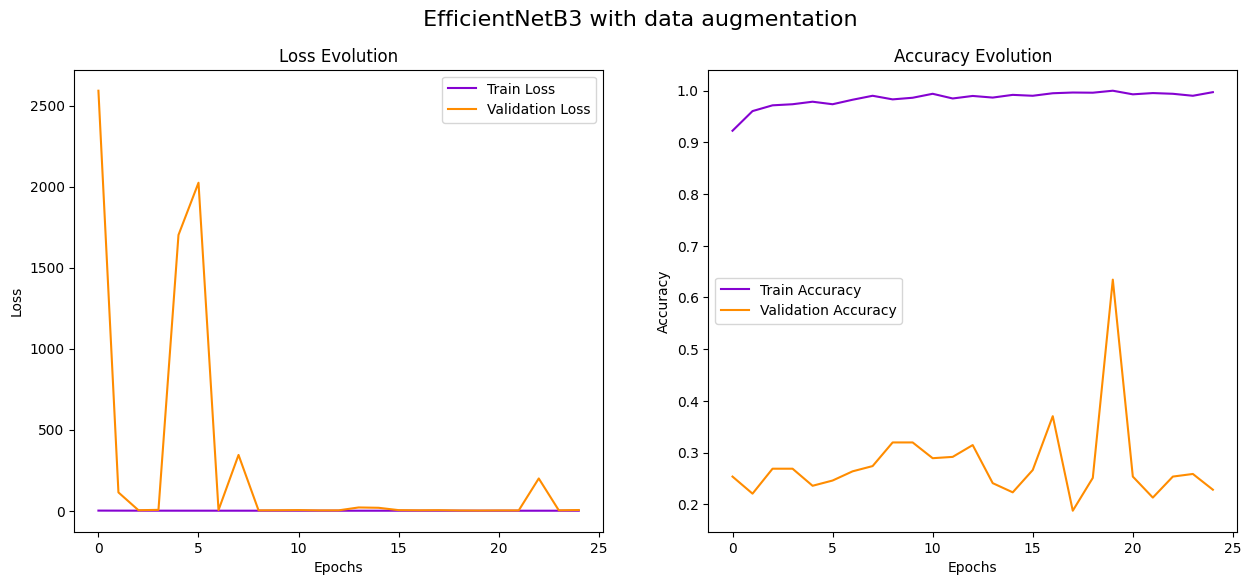

In [32]:
history_dict_dg = history_dg.history
val_loss_dg = history_dict_dg['val_loss']
train_loss_dg = history_dict_dg['loss']
val_accuracy_dg = history_dict_dg['val_accuracy']
train_accuracy_dg = history_dict_dg['accuracy']
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_dg, label='Train Loss', color='#8502d1')
plt.plot(val_loss_dg, label='Validation Loss', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_dg, label='Train Accuracy', color='#8502d1')
plt.plot(val_accuracy_dg, label='Validation Accuracy', color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.suptitle(' EfficientNetB3 with data augmentation', fontsize=16)

plt.show()


In [ ]:

)